# Aufgabe 1 (5P)
Laden Sie den Datensatz mit den Wetterdaten aus Herford “herford_weather.csv“ . Importieren Sie in Ihre Python-IDE die Bibliotheken
Tensorflow 2.X und Keras. Führen Sie eine lineare Regression mit Keras durch mit dem Ziel, den Taupunkt Taupunkt ('dewpoint_2m (°C)‘)
vorherzusagen. Nutzen Sie dabei die folgenden Zwischenschritte:

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('herford_weather.csv', parse_dates=True, index_col=0)
print(df.shape)
df.head()

(239570, 33)


,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
time,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,3,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


## a)
Selektieren Sie und analysieren Sie die Daten 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
'apparent_temperature (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)',
'weathercode (wmo code)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'shortwave_radiation
(W/m²)', 'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'windspeed_10m (km/h)',
'windspeed_100m (km/h)', 'winddirection_10m (°)', 'winddirection_100m (°)', 'windgusts_10m (km/h)', 'et0_fao_evapotranspiration
(mm)', 'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)‘]. Wählen Sie
relevante Merkmale zur Vorhersage des Taupunkts aus. Begründen Sie Ihre Auswahl anhand der visualisierten Analyseergebnisse! (2)

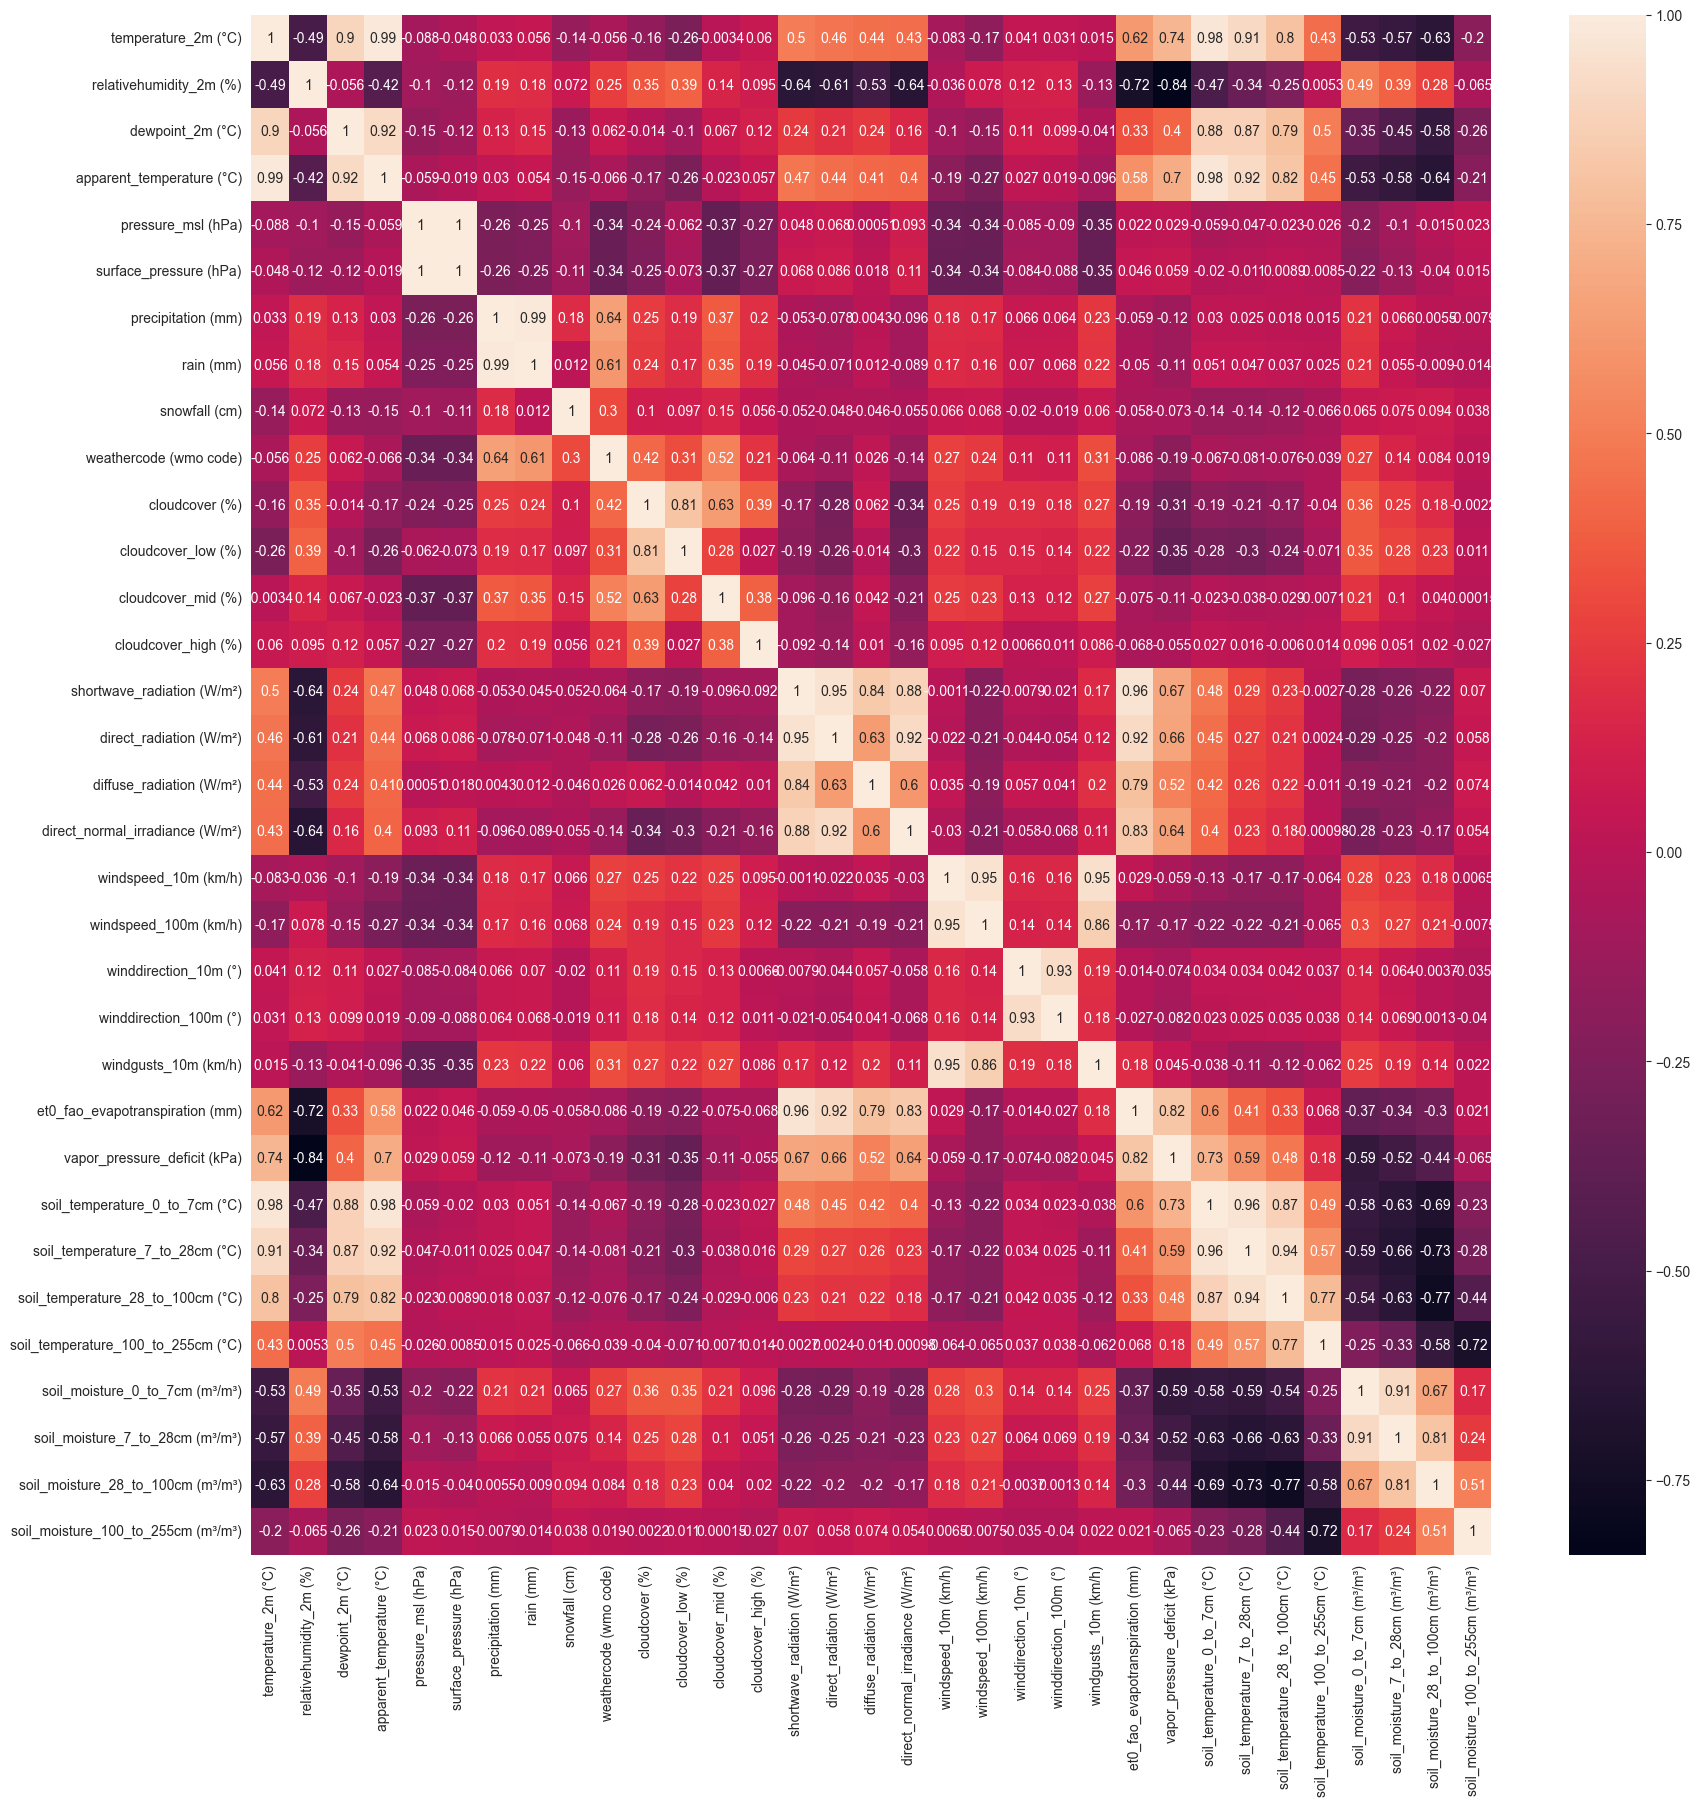

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
time,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,3,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


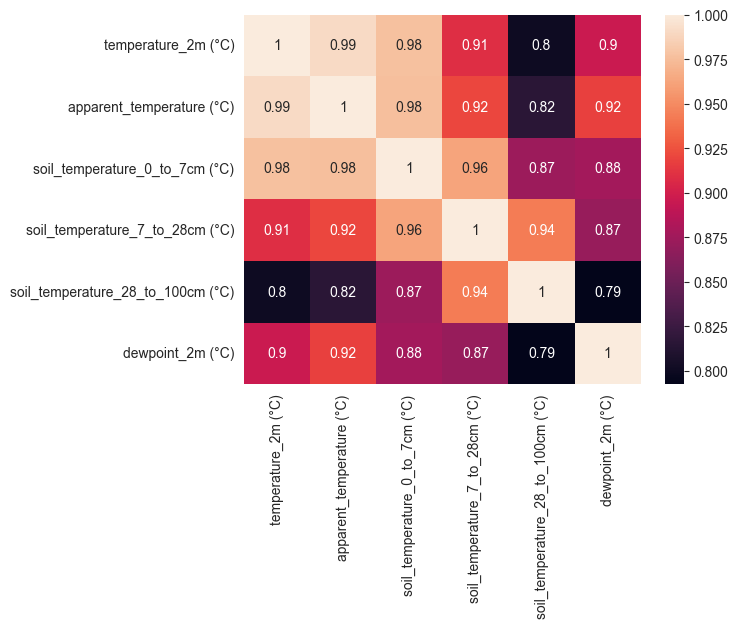

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

# most related values to dewpoint_2m (°C) are: temperature_2m (°C), apparent_temperature (°C), soil_temperature_0_to_7cm (°C), soil_temperature_7_to_28cm (°C), soil_temperature_28_to_100cm (°C)
reduced_df = df[['temperature_2m (°C)', 'apparent_temperature (°C)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'dewpoint_2m (°C)']].copy()

sns.heatmap(reduced_df.corr(), annot=True)
df.head()

## b)
Führen Sie eine Markmalsskalierung mit dem Standardskaler durch. Bauen Sie für die von Ihnen ausgewählten Merkmale ein
passendes Keras-Modell für die Lineare Regression auf und kompilieren und trainieren Sie es mit einem passendem Optimizer und
Verlustfunktion (0.5)

In [87]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
cols = reduced_df.columns.tolist()

X = reduced_df[['temperature_2m (°C)', 'apparent_temperature (°C)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)']].values
X = scaler.fit_transform(X)
y = reduced_df['dewpoint_2m (°C)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train X:", X_train.shape,"; y:", y_train.shape)
print("Test X:", X_test.shape,"; y:", y_test.shape)

Train X: (191656, 5) ; y: (191656,)
Test X: (47914, 5) ; y: (47914,)


In [88]:
model = Sequential()
model.add(Dense(units=1, input_shape=(X_train.shape[1],)))
print(model.summary())

C:\Users\aaron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

None


## c)
Lernen Sie das Model an, testen Sie passende Anzahlen für die „epochs“ und die „batch_size“. (0.5)

In [89]:
model.compile(loss='mse', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.2)

weights = model.get_layer(index=0).get_weights()
loss = model.evaluate(X_test, y_test)
print("weights:", weights, "\nloss:", loss)

Epoch 1/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 4s 759us/step - loss: 5.3909 - val_loss: 4.4048
Epoch 2/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 3s 717us/step - loss: 4.3082 - val_loss: 4.2414
Epoch 3/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 3s 722us/step - loss: 4.2419 - val_loss: 4.2126
Epoch 4/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 4s 736us/step - loss: 4.2356 - val_loss: 4.2135
Epoch 5/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 4s 725us/step - loss: 4.2340 - val_loss: 4.1966
Epoch 6/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 4s 726us/step - loss: 4.2337 - val_loss: 4.2078
Epoch 7/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 3s 720us/step - loss: 4.2339 - val_loss: 4.1876
Epoch 8/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 4s 727us/step - loss: 4.2344 - val_loss: 4.2049
Epoch 9/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 4s 737us/step - loss: 4.2349 - val_loss: 4.1882
Epoch 10/10
4792/4792 ━━━━━━━━━━━━━━━━━━━━ 3s 717us/step - loss: 4.2341 - val_loss: 4.1997
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - loss: 4.1929
weights: [array([[ 1.4187965 ],
       

## d)
Berechnen Sie für Ihr Modell R-Quadrat . (0.5)

In [90]:
from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Training Data: r2 = {:.3f}" .format(r2_train))
print("Testing Data: r2 = {:.3f}" .format(r2_test))

5990/5990 ━━━━━━━━━━━━━━━━━━━━ 2s 390us/step
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step
Training Data: r2 = 0.892
Testing Data: r2 = 0.892


## e)
Untersuchen Sie die Lernkurven, zeichnen sie sie und zeigen Sie die Lernkurve für Ihr bestes erzieltes Ergebnis! (0.5)

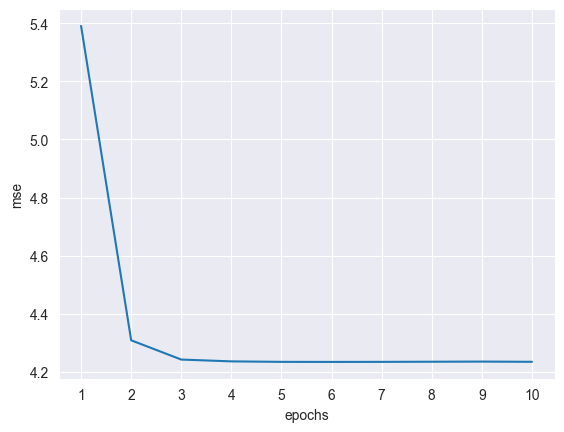

In [91]:
loss_mse = history.history['loss']
plt.xticks(range(1, len(loss_mse)+1))
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)

## f)
Nun sollen Sie testen, wie gut der Schneefall in Herford (snowfall (cm)) mithilfe einer linearen Regression aus dem Datensatz
geschätzt werden kann. Führen Sie dazu die Schritte a - e noch einmal durch. Erklären Sie Ihr Ergebnis. (1)

In [92]:
# prediction: The relations between the attributes present is minimal to snowfall (cm)

reduced_df = df.copy()

scaler = StandardScaler()

X = reduced_df.drop(columns=['snowfall (cm)']).values
X = scaler.fit_transform(X)
y = reduced_df['snowfall (cm)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train X:", X_train.shape,"; y:", y_train.shape)
print("Test X:", X_test.shape,"; y:", y_test.shape)

Train X: (191656, 32) ; y: (191656,)
Test X: (47914, 32) ; y: (47914,)


In [93]:
model = Sequential()
model.add(Dense(units=1, input_shape=(X_train.shape[1],)))
print(model.summary())

C:\Users\aaron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
model.compile(loss='mse', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=10, verbose=1)

weights = model.get_layer(index=0).get_weights()
loss = model.evaluate(X_test, y_test)
print("weights:", weights, "\nloss:", loss)

Epoch 1/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 587us/step - loss: 0.0064
Epoch 2/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 598us/step - loss: 1.3321e-04
Epoch 3/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 588us/step - loss: 8.5221e-05
Epoch 4/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 587us/step - loss: 7.2690e-05
Epoch 5/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 596us/step - loss: 6.3780e-05
Epoch 6/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 591us/step - loss: 5.6497e-05
Epoch 7/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 599us/step - loss: 5.0444e-05
Epoch 8/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 611us/step - loss: 4.5355e-05
Epoch 9/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 584us/step - loss: 4.1236e-05
Epoch 10/10
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 588us/step - loss: 3.7710e-05
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - loss: 3.4757e-05
weights: [array([[ 1.0628939e-01],
       [ 1.7020114e-02],
       [-3.1780142e-02],
       [-7.1864158e-02],
       [-4.6671156e-02],
       [ 4.6615042e-02],
       [ 1.9526660e-01],
    

In [95]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Training Data: r2 = {:.3f}" .format(r2_train))
print("Testing Data: r2 = {:.3f}" .format(r2_test))

5990/5990 ━━━━━━━━━━━━━━━━━━━━ 2s 391us/step
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step
Training Data: r2 = 0.968
Testing Data: r2 = 0.965


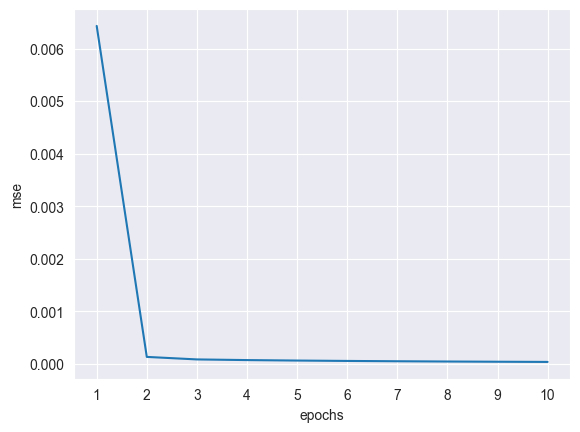

In [96]:
loss_mse = history.history['loss']
plt.xticks(range(1, len(loss_mse)+1))
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)